# Analysis

## Config

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from matplotlib.colors import LinearSegmentedColormap
from itertools import combinations

## Get Data

In [3]:
prices_df = pd.read_csv("prices.txt", sep=r'\s+', header=None)
prices_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,13.46,71.65,48.46,50.52,52.10,13.00,18.98,47.71,69.49,49.96,...,32.64,55.76,14.46,58.94,36.71,52.62,49.33,36.22,49.00,56.09
1,13.48,72.10,48.52,50.50,52.06,12.95,18.95,47.84,69.73,49.93,...,32.52,55.97,14.44,59.81,36.64,52.58,49.20,36.27,48.84,56.08
2,13.47,72.35,48.48,50.62,51.80,12.79,18.98,47.98,69.60,49.33,...,32.48,56.34,14.50,59.04,36.89,52.49,49.48,36.39,48.56,55.90
3,13.53,72.51,48.42,50.75,51.66,12.66,18.96,48.74,69.54,49.67,...,32.59,56.32,14.40,58.73,36.94,52.40,49.42,36.41,49.00,56.14
4,13.64,71.99,48.40,50.65,51.97,12.62,18.89,48.88,69.68,49.46,...,32.64,56.32,14.36,59.01,37.03,52.44,49.79,36.42,48.14,55.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,13.69,67.73,46.64,45.72,52.42,10.07,18.05,48.42,69.00,56.19,...,30.73,75.82,10.63,61.35,32.85,50.57,64.36,33.74,33.83,53.47
496,13.58,67.75,46.65,45.71,52.57,10.07,17.99,47.65,69.04,56.00,...,30.70,76.46,10.65,61.20,32.60,50.54,64.65,33.78,33.42,53.91
497,13.69,67.83,46.66,45.66,52.38,10.02,18.02,46.87,68.95,56.09,...,30.70,75.16,10.75,60.82,32.79,50.42,64.28,33.60,33.75,54.22
498,13.55,67.61,46.73,45.62,52.29,10.02,18.03,46.21,69.03,56.51,...,30.69,76.09,10.68,60.73,32.45,50.31,63.60,33.79,33.53,54.50


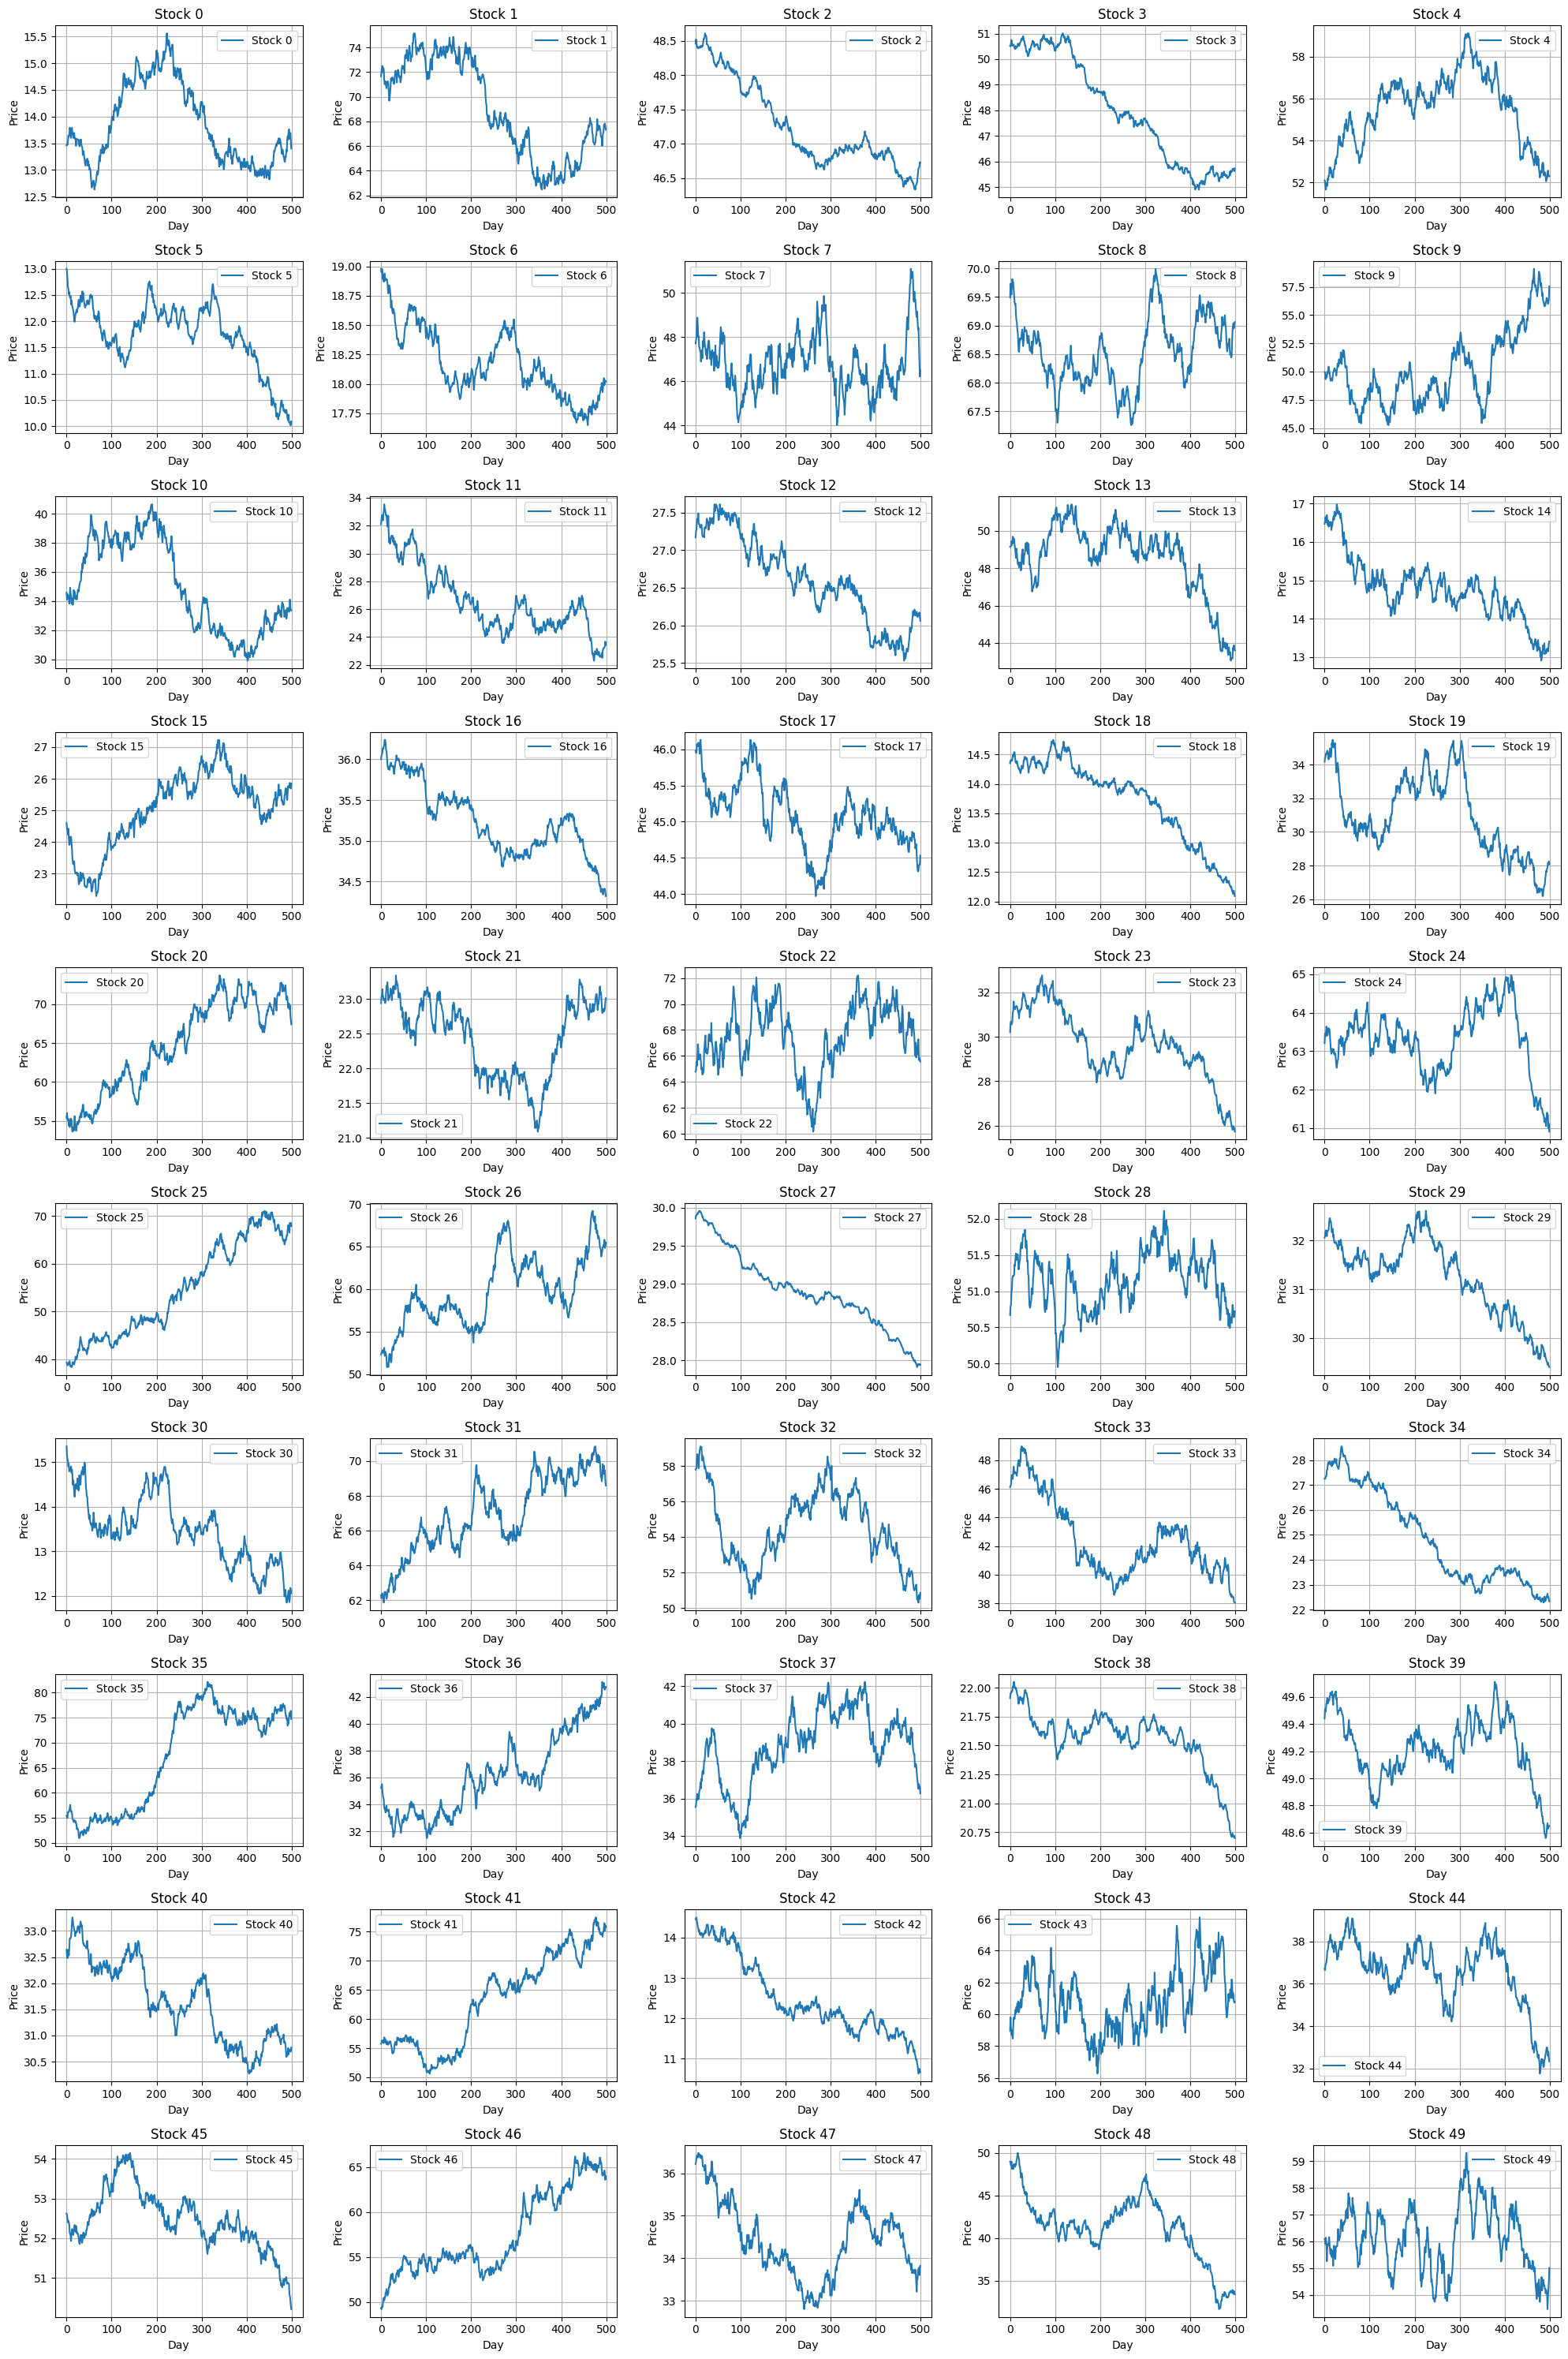

In [4]:
num_stocks = 50  # Since there are exactly 50 stocks
num_rows = 10
num_cols = 5

# Create subplots with a grid layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 30))  # Adjust the figsize as needed

for n in range(0, 50):    
    ax = axes[n // num_cols, n % num_cols]
    ax.plot(prices_df.index, prices_df[n], linestyle='-', label=f'Stock {n}')
    ax.set_title(f'Stock {n}')
    ax.set_xlabel('Day')
    ax.set_ylabel('Price')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

## Calculate Returns

In [5]:
prev_return_periods = [(0, 2), (2, 5), (5, 12), (12, 30)]
future_return_periods = [1, 2, 3, 4, 5, 7, 10, 12, 15, 20, 25, 30, 35, 40, 45, 50]

In [6]:
def calculate_prev_returns(prices, start_day, end_day):
    return (prices.shift(start_day) / prices.shift(end_day) - 1)
def calculate_future_returns(prices, end_day):
    return (prices.shift(-end_day) / prices - 1)

In [7]:
return_dfs = []
return_df_names = []

for start, end in prev_return_periods:
    df = calculate_prev_returns(prices_df, start, end)
    return_dfs.append(df)
    return_df_names.append(f"prev_returns_{start}_{end}d")

for d in future_return_periods:
    df = calculate_future_returns(prices_df, d)
    return_dfs.append(df)
    return_df_names.append(f"future_returns_{d}d")

In [8]:
to_join_dfs = []
for df, name in zip(return_dfs, return_df_names):
    new_df = pd.melt(df, ignore_index=False, var_name="stock", value_name=name).reset_index().rename(columns={"index":"day"})
    to_join_dfs.append(new_df)

In [9]:
all_returns_df = pd.melt(prices_df, ignore_index=False, var_name="stock", value_name="price").reset_index().rename(columns={"index":"day"})
for df in to_join_dfs:
    all_returns_df = all_returns_df.merge(df, on=["day", "stock"])
all_returns_df

,day,stock,price,prev_returns_0_2d,prev_returns_2_5d,prev_returns_5_12d,prev_returns_12_30d,future_returns_1d,future_returns_2d,future_returns_3d,...,future_returns_10d,future_returns_12d,future_returns_15d,future_returns_20d,future_returns_25d,future_returns_30d,future_returns_35d,future_returns_40d,future_returns_45d,future_returns_50d
0,0,0,13.46,NaN,NaN,NaN,NaN,0.001486,0.000743,0.005201,...,0.010401,0.024517,0.010401,0.009658,0.008172,0.007429,-0.002972,-0.019316,-0.019316,-0.026746
1,1,0,13.48,NaN,NaN,NaN,NaN,-0.000742,0.003709,0.011869,...,0.020772,0.014837,0.011128,-0.002226,0.006677,0.002226,-0.014837,-0.026706,-0.020030,-0.035608
2,2,0,13.47,0.000743,NaN,NaN,NaN,0.004454,0.012621,0.011136,...,0.023756,0.017075,0.016333,0.008166,0.000742,0.007424,-0.008909,-0.028953,-0.028953,-0.032665
3,3,0,13.53,0.003709,NaN,NaN,NaN,0.008130,0.006652,0.010347,...,0.011086,0.005174,0.004435,0.003695,-0.005174,-0.004435,-0.013304,-0.026608,-0.026608,-0.039172
4,4,0,13.64,0.012621,NaN,NaN,NaN,-0.001466,0.002199,0.010997,...,0.004399,-0.000733,-0.004399,-0.005132,-0.014663,-0.014663,-0.027859,-0.034457,-0.041789,-0.057185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,495,49,53.47,-0.010731,-0.003319,0.001108,-0.012757,0.008229,0.014027,0.019263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24996,496,49,53.91,-0.002775,0.000000,-0.006615,-0.011265,0.005750,0.010944,0.020404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24997,497,49,54.22,0.014027,-0.013287,-0.003127,-0.009114,0.005164,0.014570,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24998,498,49,54.50,0.010944,-0.002590,-0.009529,0.000917,0.009358,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Correlated Stocks

In [85]:
def lagged_correlations(df, lag=1):
    correlations = pd.DataFrame(index=df.columns, columns=df.columns)
    for stock1 in df.columns:
        for stock2 in df.columns:
            if stock1 != stock2:
                correlations.loc[stock1, stock2] = df[stock1].corr(df[stock2].shift(lag))
    return correlations

# Define a function to find optimal stock pairs based on different n_day_returns and lag
def find_optimal_pairs(prices_df, correlation_threshold=0.5, max_lag=5, max_n_day_returns=5):
    # Container for best pairs
    best_pairs = []
    
    # Iterate over different n_day_returns
    for n_day_returns in range(1, max_n_day_returns + 1):
        # Calculate returns with current n_day_returns
        returns = prices_df.pct_change(n_day_returns).dropna()
        
        # Container for pairs with high correlation
        high_corr_pairs = []
        
        # Iterate over different lag values
        for lag in range(0, max_lag + 1):
            # Calculate lagged correlations
            lagged_corr_matrix = lagged_correlations(returns, lag=lag).astype(float)
            
            # Iterate over all pairs of stocks
            for stock1, stock2 in combinations(prices_df.columns, 2):
                correlation = lagged_corr_matrix.loc[stock1, stock2]
                
                # Check if correlation meets the threshold
                if abs(correlation) >= correlation_threshold:
                    high_corr_pairs.append((stock1, stock2, n_day_returns, lag, correlation))
        
        # Add pairs with high correlation for current n_day_returns to best_pairs
        best_pairs.extend(high_corr_pairs)
    
    return best_pairs

Stock1	Stock2	Best n_day_returns	Best lag	Best correlation
27	38	1			0		0.67
38	39	1			0		0.55
27	38	2			0		0.73
27	39	2			0		0.60
38	39	2			0		0.63
27	38	2			1		0.51
16	27	3			0		0.51
16	38	3			0		0.52
27	28	3			0		0.51
27	38	3			0		0.76
27	39	3			0		0.65
28	38	3			0		0.53
38	39	3			0		0.67
27	38	3			1		0.61
27	39	3			1		0.56
38	39	3			1		0.56
16	27	4			0		0.53
16	38	4			0		0.55
27	28	4			0		0.53
27	38	4			0		0.78
27	39	4			0		0.66
28	38	4			0		0.55
29	38	4			0		0.51
38	39	4			0		0.68
27	38	4			1		0.66
27	39	4			1		0.60
38	39	4			1		0.59
16	27	5			0		0.54
16	38	5			0		0.56
24	38	5			0		0.50
27	28	5			0		0.56
27	38	5			0		0.78
27	39	5			0		0.67
28	38	5			0		0.57
29	38	5			0		0.52
38	39	5			0		0.68
16	38	5			1		0.50
27	28	5			1		0.50
27	38	5			1		0.69
27	39	5			1		0.62
28	38	5			1		0.51
29	38	5			1		0.51
38	39	5			1		0.62
27	38	5			2		0.53
27	39	5			2		0.51
38	39	5			2		0.52


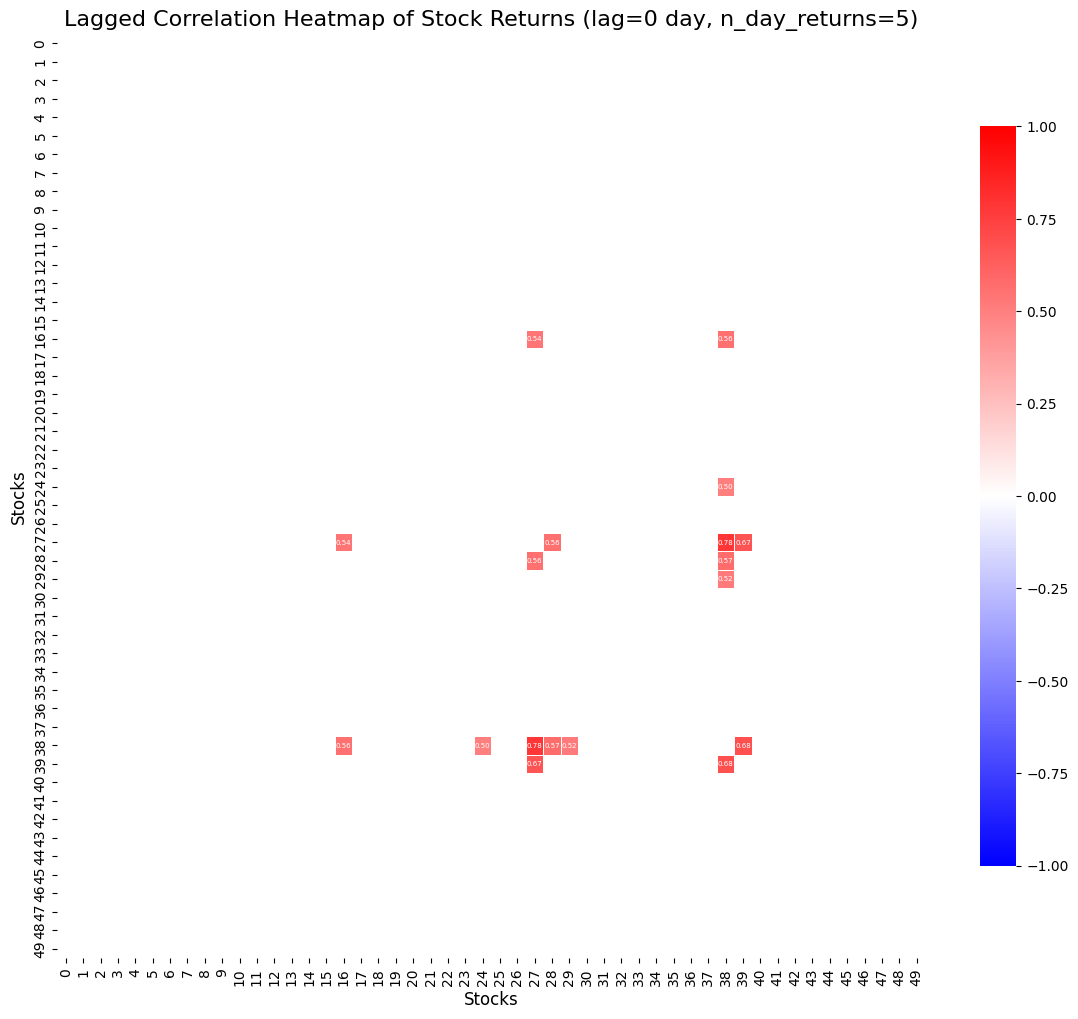

In [88]:
correlation_threshold = 0.5
max_lag = 5
max_n_day_returns = 5

# Find the optimal pairs based on different n_day_returns and lag
optimal_pairs = find_optimal_pairs(prices_df, correlation_threshold=correlation_threshold, max_lag=max_lag, max_n_day_returns=max_n_day_returns)

# Print the optimal pairs found
print("Stock1\tStock2\tBest n_day_returns\tBest lag\tBest correlation")
for stock1, stock2, best_n_day_returns, best_lag, best_corr in optimal_pairs:
    print(f"{stock1}\t{stock2}\t{best_n_day_returns}\t\t\t{best_lag}\t\t{best_corr:.2f}")
    
# Optionally, visualize the best pair found
if optimal_pairs:
    best_pair = max(optimal_pairs, key=lambda x: abs(x[4]))
    stock1, stock2, best_n_day_returns, best_lag, best_corr = best_pair

    # Calculate returns with the optimal n_day_returns
    returns = prices_df.pct_change(best_n_day_returns).dropna()

    # Calculate lagged correlations with the optimal lag
    lagged_corr_matrix = lagged_correlations(returns, lag=best_lag).astype(float)

    mask = np.abs(lagged_corr_matrix) < correlation_threshold

    # Create a custom color map
    cmap = LinearSegmentedColormap.from_list('custom_cmap', ['blue', 'white', 'red'])

    # Plot the heatmap for lagged correlations
    plt.figure(figsize=(14, 12))
    sns.heatmap(lagged_corr_matrix, annot=True, cmap=cmap, vmin=-1, vmax=1, fmt=".2f", linewidths=0.5, annot_kws={"size": 5}, mask=mask, cbar_kws={"shrink": .8})

    # Title and labels
    plt.title(f'Lagged Correlation Heatmap of Stock Returns (lag={best_lag} day, n_day_returns={best_n_day_returns})', fontsize=16)
    plt.xlabel('Stocks', fontsize=12)
    plt.ylabel('Stocks', fontsize=12)

    # Display the heatmap
    plt.show()

## Regress Linearly

In [37]:
previous_returns_cols = all_returns_df.filter(like="prev_returns").columns.tolist()
day_split = 400
results = []

# Loop through each stock
for stock_id in all_returns_df["stock"].unique():
    stock_data = all_returns_df[all_returns_df["stock"] == stock_id]

    # Loop through each mark time
    for days in future_return_periods:
        future_returns_col = f"future_returns_{days}d"
        model_df = stock_data[["day", future_returns_col] + previous_returns_cols].dropna()
        
        X = model_df[["day"] + previous_returns_cols]
        y = model_df[["day", future_returns_col]]

        X_train = X[X["day"] <= day_split].drop(columns=['day'])
        X_test = X[X["day"] > day_split].drop(columns=['day'])
        y_train = y[y["day"] <= day_split].drop(columns=['day'])
        y_test = y[y["day"] > day_split].drop(columns=['day'])

        model = LinearRegression(fit_intercept=False).fit(X_train, y_train)
        
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        r_squared = r2_score(y_test, predictions)

        results.append({
            'stock': stock_id,
            'mark_time_days': days,
            'coefficients': model.coef_,
            'mse': mse,
            'r_squared': r_squared,
            'actual_returns': y_test[future_returns_col].values,
            'predicted_returns': predictions.flatten(),
        })

results_df = pd.DataFrame(results)
results_df

,stock,mark_time_days,coefficients,mse,r_squared,actual_returns,predicted_returns
0,0,1,"[[-0.06854000104566835, 0.0048009108519413285,...",0.000035,-0.003942,"[0.0022865853658537993, -0.00836501901140696, ...","[-0.00021452467564829058, -0.00046341650926640..."
1,0,2,"[[-0.09086400846732587, 0.024585611853192843, ...",0.000065,-0.005156,"[-0.0060975609756097615, -0.007604562737642539...","[-0.0002878161246564158, -0.000804410346383730..."
2,0,3,"[[-0.09861736672917308, 0.03182477463832029, 0...",0.000089,-0.033846,"[-0.005335365853658458, -0.009885931558935468,...","[-0.0005849175049523137, -0.001204045831891432..."
3,0,4,"[[-0.10479306897312766, 0.0633755153537672, 0....",0.000118,-0.043499,"[-0.007621951219512146, -0.005323193916349833,...","[-0.0005672224729932324, -0.0014813102630727, ..."
4,0,5,"[[-0.054880914297317424, 0.06102137392972789, ...",0.000148,-0.045386,"[-0.0030487804878047697, -0.006083650190114032...","[-0.00086963020136921, -0.0019772953298178987,..."
...,...,...,...,...,...,...,...
795,49,30,"[[-0.370767141694266, -0.45840475740140874, -0...",0.000626,-2.881904,"[0.008557675164913459, 0.00786275911365264, 0....","[0.007034784921625859, 0.010392567612947679, 0..."
796,49,35,"[[-0.2317611550112476, -0.3460884931733167, -0...",0.000785,-5.629728,"[-0.0003565697985381533, 0.00268048606147242, ...","[0.008903742210734724, 0.012040465521421944, 0..."
797,49,40,"[[-0.14927703279313123, -0.4119256062608259, -...",0.000936,-5.674844,"[-0.006418256373685316, -0.005182273052180109,...","[0.008566232986596298, 0.010485631826203013, 0..."
798,49,45,"[[-0.3238383771033315, -0.4935893320445985, -0...",0.001099,-5.002730,"[-0.010518809056872969, -0.007862759113652529,...","[0.006947308044042481, 0.008499427816492067, 0..."


## View Results

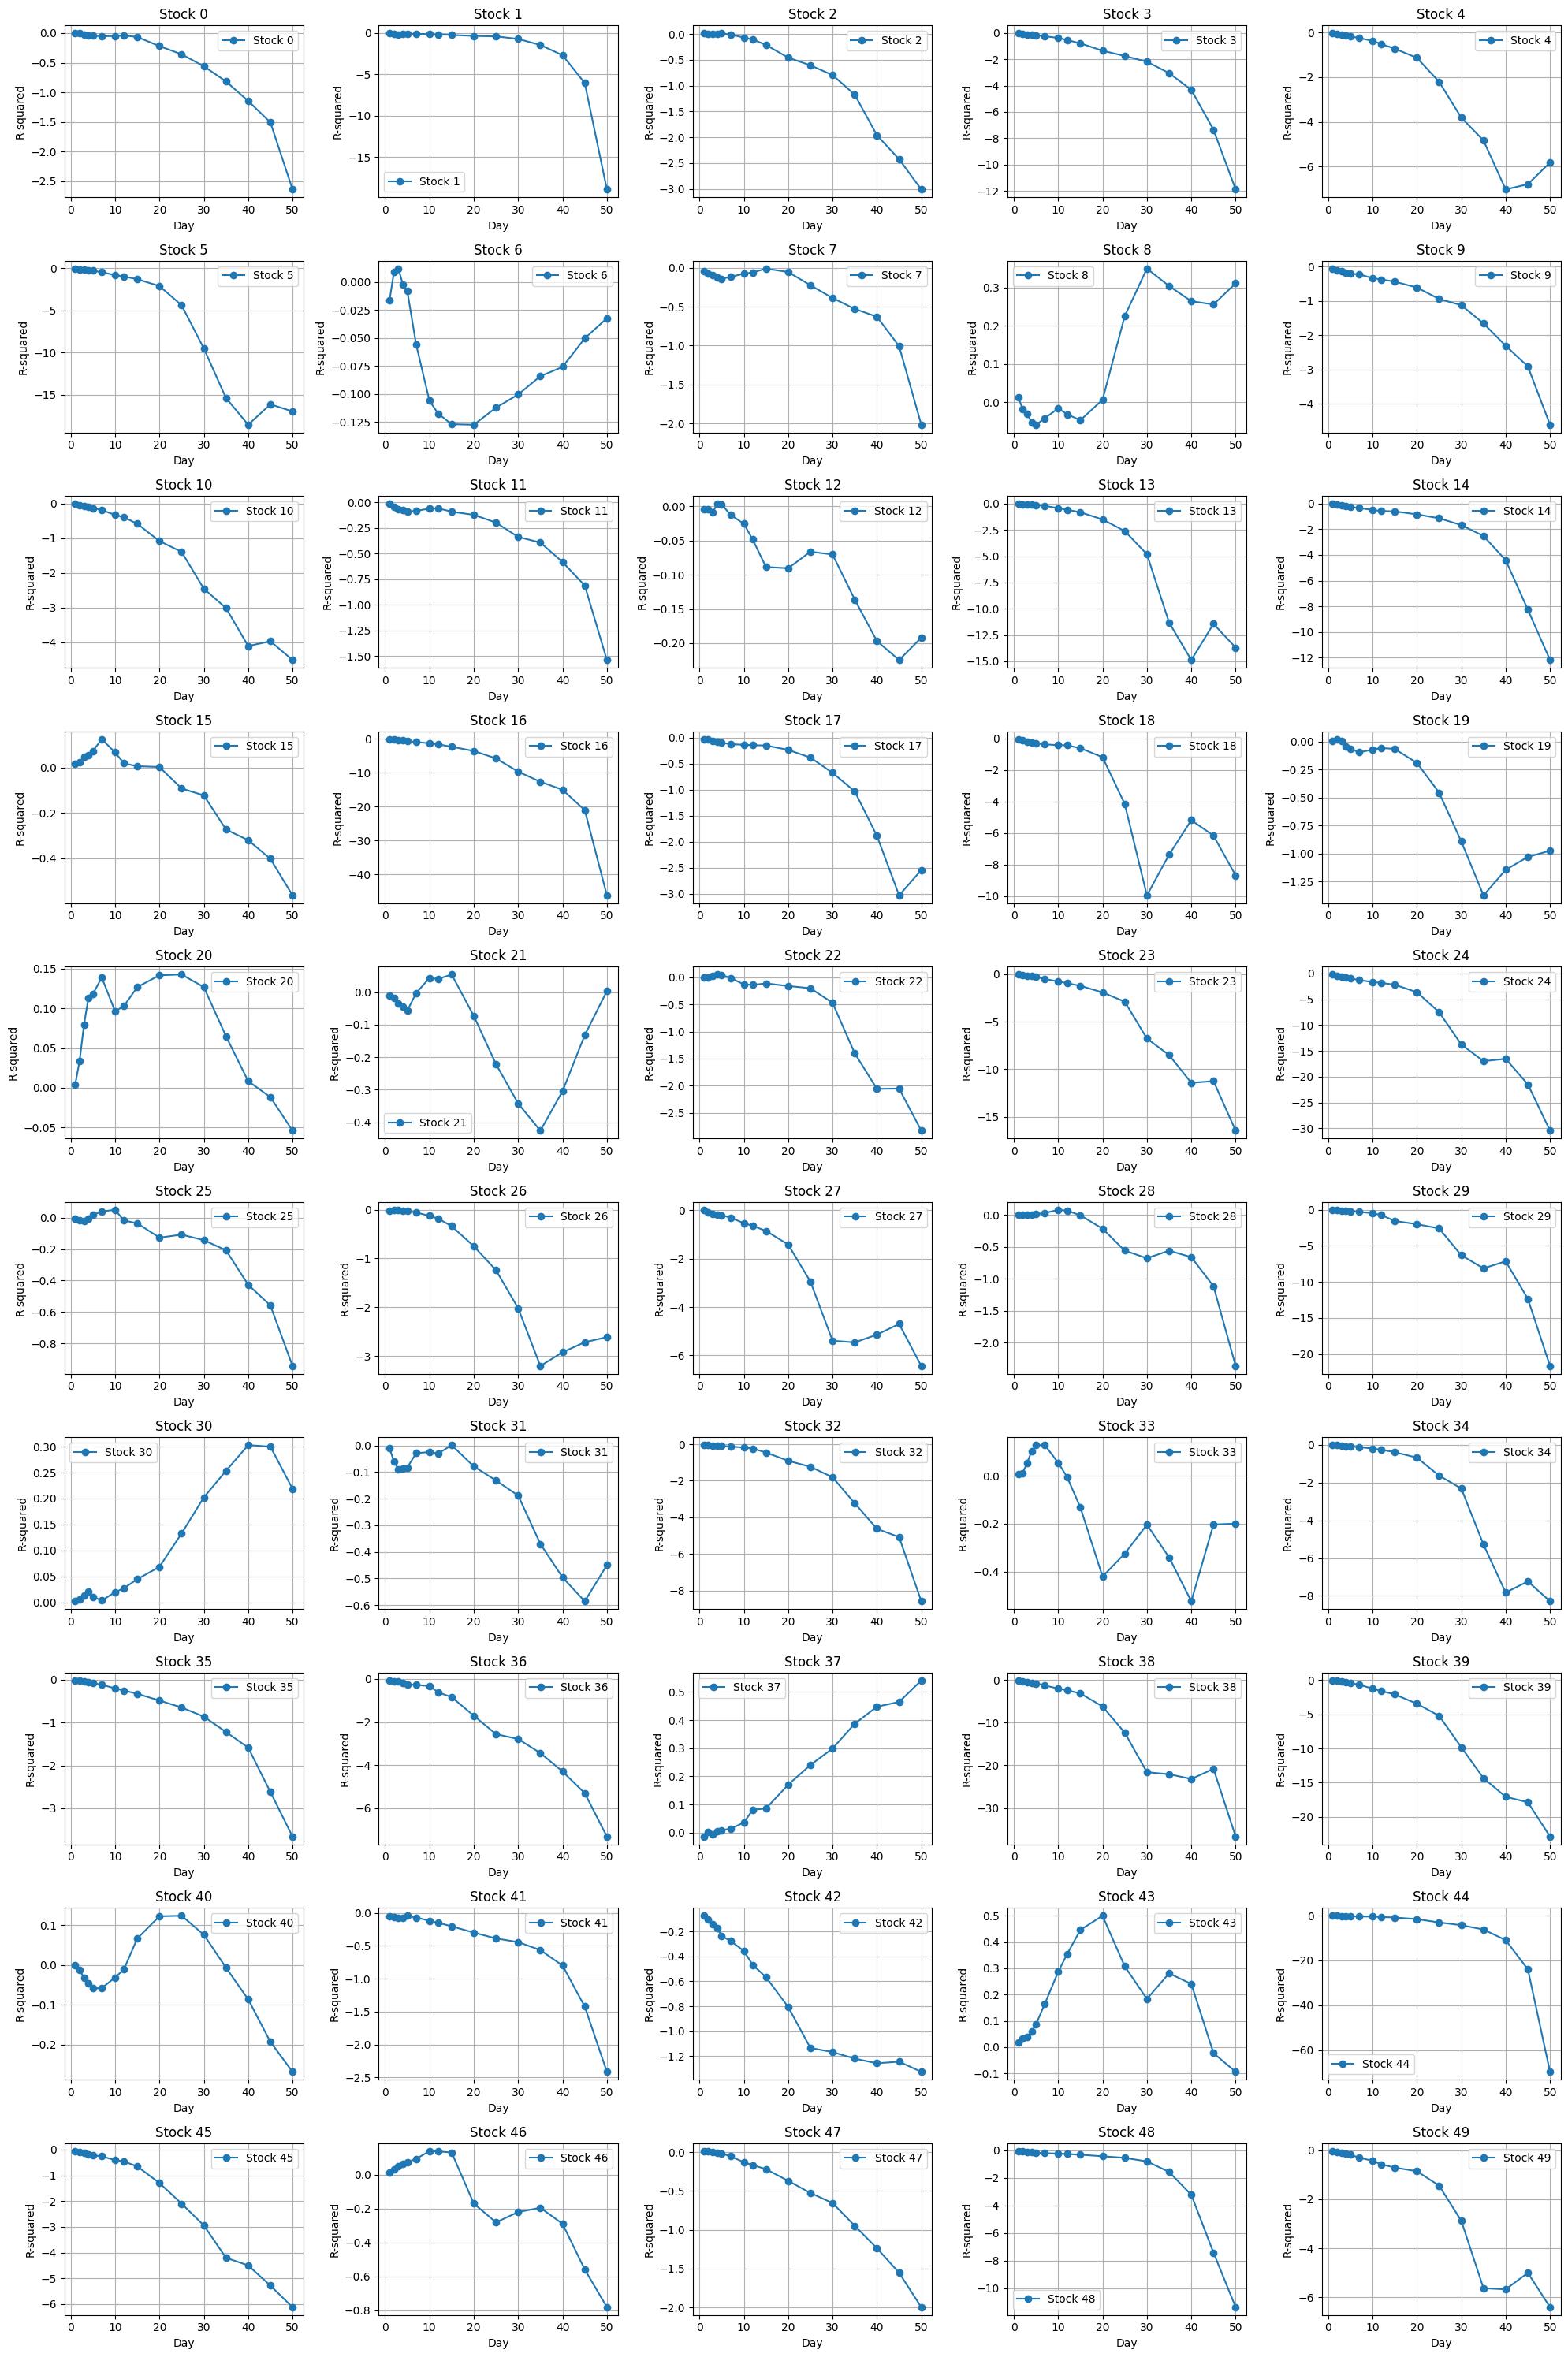

In [39]:
num_stocks = 50  # Since there are exactly 50 stocks
num_rows = 10
num_cols = 5

# Create subplots with a grid layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 30))  # Adjust the figsize as needed

for i, stock_id in enumerate(results_df['stock'].unique()):
    stock_data = results_df[results_df['stock'] == stock_id]
    
    ax = axes[i // num_cols, i % num_cols]
    ax.plot(stock_data['mark_time_days'], stock_data['r_squared'], marker='o', linestyle='-', label=f'Stock {stock_id}')
    ax.set_title(f'Stock {stock_id}')
    ax.set_xlabel('Day')
    ax.set_ylabel('R-squared')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

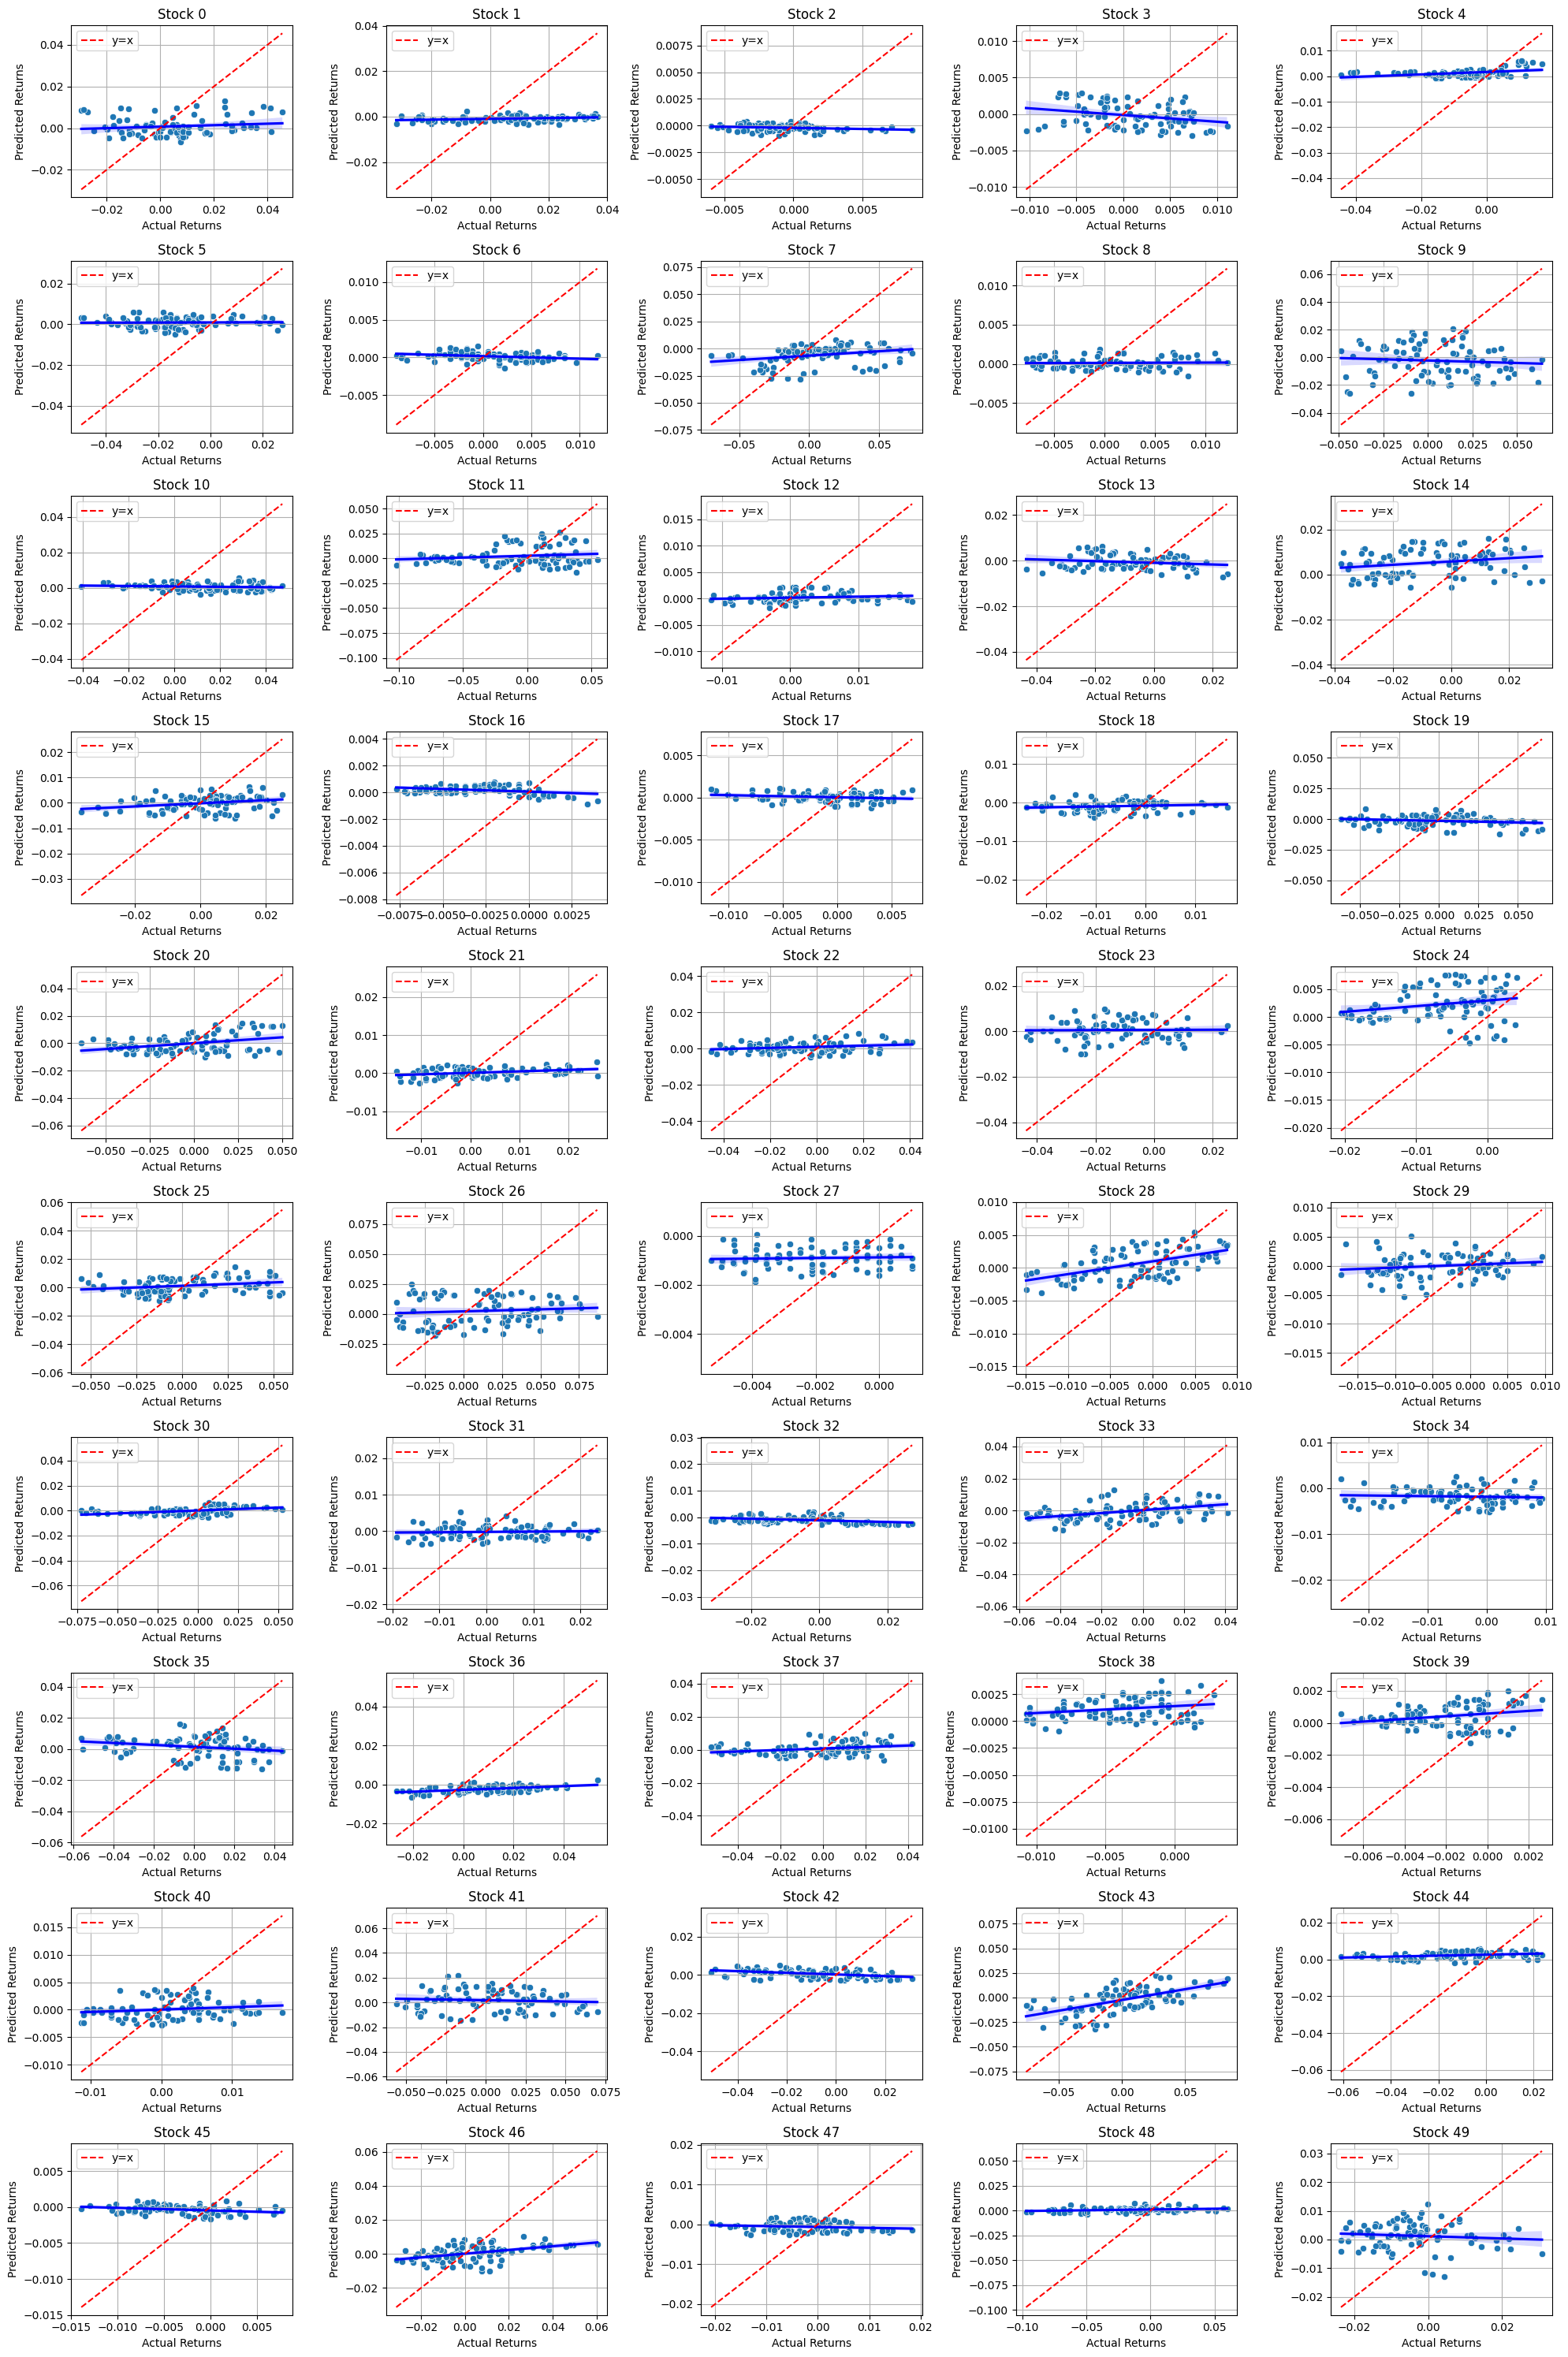

In [44]:
num_stocks = 50
num_rows = 10
num_cols = 5

mark_time_days = 10

# Create subplots with a grid layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 30))  # Adjust the figsize as needed

for i, stock_id in enumerate(results_df['stock'].unique()):
    stock_data = results_df[results_df['stock'] == stock_id]
    stock_data = stock_data[stock_data['mark_time_days'] == mark_time_days]
    actual = np.array(stock_data['actual_returns'].iloc[0])
    pred = np.array(stock_data['predicted_returns'].iloc[0])

    ax = axes[i // num_cols, i % num_cols]
    
    # Scatter plot of predicted vs actual returns
    sns.scatterplot(x=actual, y=pred, ax=ax)
    
    # Plot the trend line
    sns.regplot(x=actual, y=pred, ax=ax, scatter=False, color='blue', line_kws={"label":"Trend Line"})
    
    # Plot the y=x line
    max_val = max(max(actual), max(pred))
    min_val = min(min(actual), min(pred))
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', label='y=x')
    
    ax.set_title(f'Stock {stock_id}')
    ax.set_xlabel('Actual Returns')
    ax.set_ylabel('Predicted Returns')
    ax.legend()
    ax.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()